<h1> 
<center>Health Insurance <br> Premium Prediction </center> </h1>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df= pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Charges column is dependent or target column

### statistical analysis

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Inferences

--> Mean and Median of age column is approximately equal which means age feature is normally distributed.<br>
--> Mean and Median of bmi column is approximately equal which means age feature is normally distributed.<br>
--> Maximum no of children are 5.<br>
--> Standard deviation of age column is approximately 14 which means 68% of data lie between age 25 and 53.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
print("Percentage of unique value to total value in region column: ",(df['region'].nunique()/df['region'].count())*100)

Percentage of unique value to total value in region column:  0.29895366218236175


In [7]:
# Percentage of unique value to total value in region column is less than 5% hence we can convert datatype to category
df['region']=df['region'].astype('category')

In [8]:
#similary we can convert datatype of sex and smoker to category
df['sex']=df['sex'].astype('category')
df['smoker']=df['smoker'].astype('category')

In [9]:
#range of normal BMI is 18.5 to 24.9
df[((df['bmi']<18.5) | (df['bmi']>24.9))]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450


In [10]:
# No smoker is present less than 18 year.
df[(df['age']<18) & (df['smoker'] =='yes')]

,age,sex,bmi,children,smoker,region,charges


In [11]:
df[(df['age']<19) & (df['children'] >0)]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
46,18,female,38.665,2,no,northeast,3393.35635
57,18,male,31.680,2,yes,southeast,34303.16720
250,18,male,17.290,2,yes,northeast,12829.45510
270,18,male,29.370,1,no,southeast,1719.43630
369,18,male,30.400,3,no,northeast,3481.86800
469,18,female,24.090,1,no,southeast,2201.09710
564,18,female,32.120,2,no,southeast,2801.25880
571,18,female,37.290,1,no,southeast,2219.44510
710,18,male,35.200,1,no,southeast,1727.54000


In [12]:
# Average premium for different region
df.groupby('region').mean().loc[ : ,['charges']]

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


### Cleaning of data

#### Check missing value

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Univariate Analysis 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

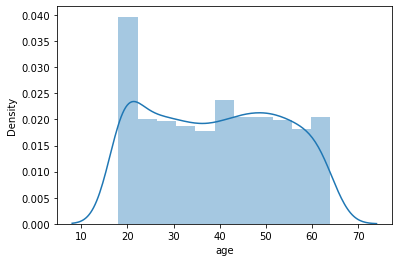

In [14]:
sns.distplot(df['age'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

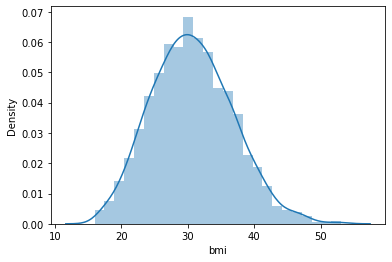

In [15]:
sns.distplot(df['bmi'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

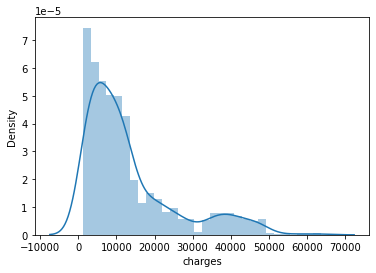

In [16]:
sns.distplot(df["charges"])

<AxesSubplot:>

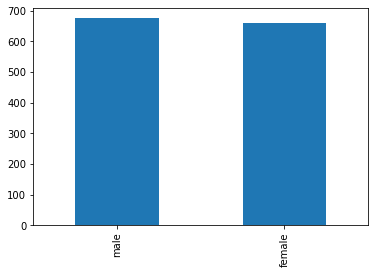

In [17]:
df['sex'].value_counts().plot.bar()

<AxesSubplot:>

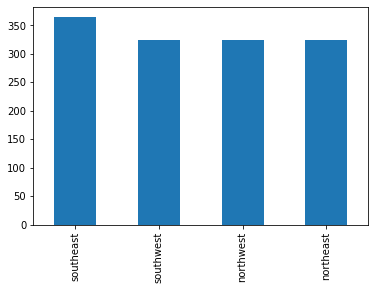

In [18]:
df['region'].value_counts().plot.bar()

### Bivariate Analysis

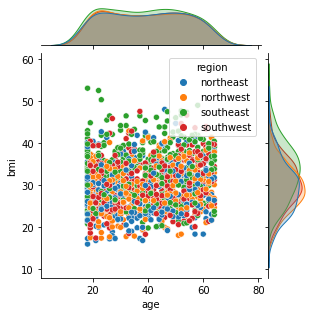

In [19]:
sns.jointplot(x='age',y='bmi',hue='region',data=df,height=4.5)

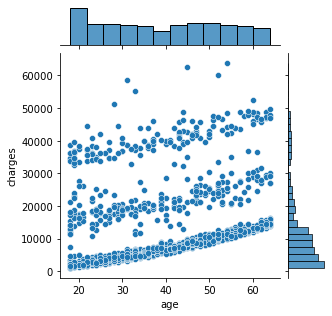

In [20]:
sns.jointplot(x='age',y='charges',data=df,height=4.5)

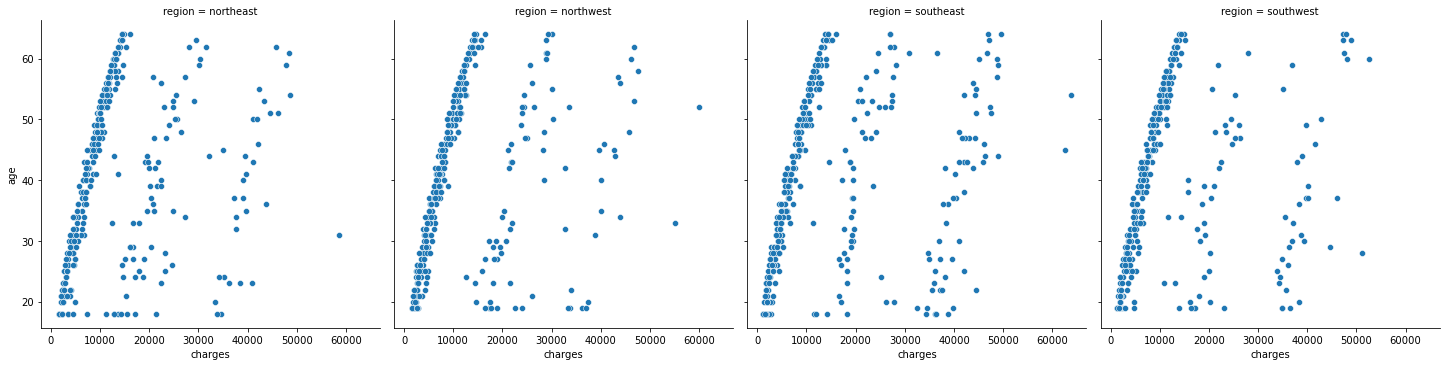

In [21]:
sns.relplot(data=df,x='charges',y='age', kind='scatter',col='region')

<AxesSubplot:xlabel='region', ylabel='bmi'>

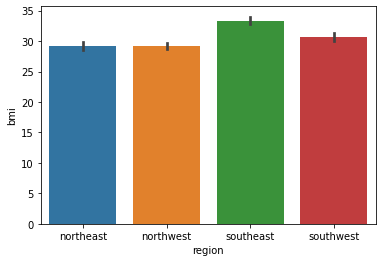

In [22]:
sns.barplot(x="region", y='bmi',data= df)

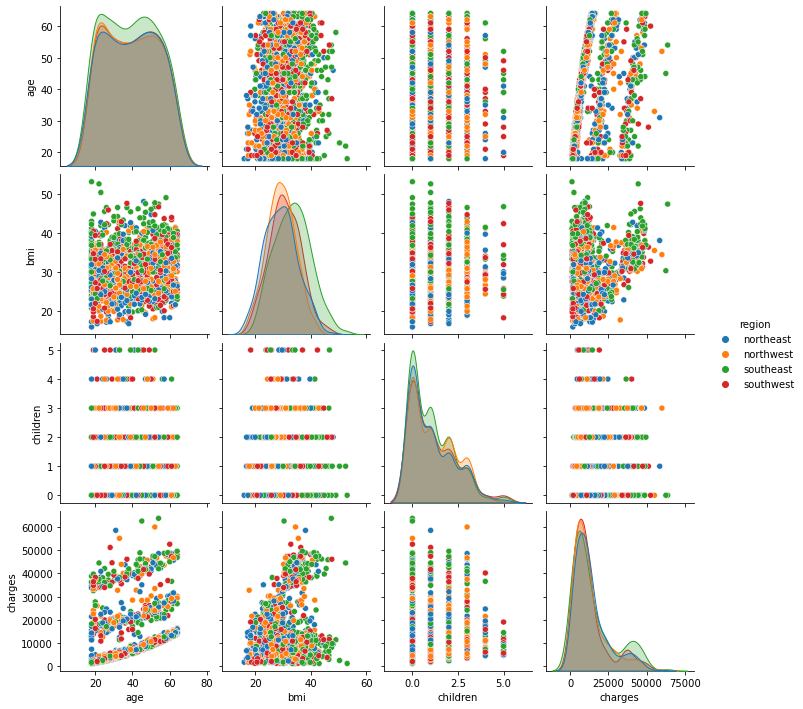

In [23]:
sns.pairplot(df,hue='region')

<AxesSubplot:>

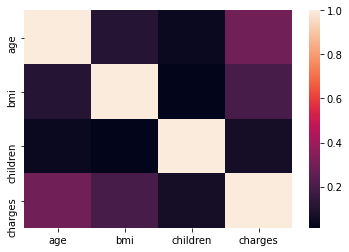

In [24]:
#No correlation between different features
corr = df.corr()
sns.heatmap(corr)

### Check Duplicates 

In [25]:
df.duplicated().sum()

1

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df=df.reset_index(drop=True)

In [28]:
#df=df.sort_values(by ='charges')

In [29]:
x=df.drop('charges',axis=1)
y=df['charges']

### Splitting of data into training and testing dataset

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=100)

In [31]:
ohe = OneHotEncoder()
ohe.fit(x[['sex','smoker','region']])

OneHotEncoder()

In [32]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['sex','smoker','region']),remainder='passthrough')

### Model Building 

In [33]:
lr=LinearRegression()

In [34]:
linear_pipe = make_pipeline(column_trans,lr)

In [35]:
linear_pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['female', 'male'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

In [36]:
linear_pred= linear_pipe.predict(x_test)

In [37]:
r2_score(y_test,linear_pred)

0.7518789895576371

### Random Forest Algorithm

In [38]:
rf = RandomForestRegressor(n_estimators=100)
forest_pipe = make_pipeline(column_trans,rf)
forest_pipe.fit(x_train,y_train)
forest_pred= forest_pipe.predict(x_test)

In [39]:
r2_score(y_test,forest_pred)

0.84088072635